In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Part a.

In [2]:
def fftransform(img, name):
    path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P2/'
    fft_img = np.fft.fftshift(np.fft.fft2(img))
    spectrum_img = np.abs(fft_img)
    phase_img = np.angle(fft_img)
    plt.figure(figsize=(8,8))
    plt.imshow(np.log10(spectrum_img/1000+1), cmap='gray')
    plt.suptitle('Spectrum')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + name + '_spectrum.png')
    plt.show()
    plt.figure(figsize=(8,8))
    plt.imshow(phase_img, cmap='gray')
    plt.suptitle('Phase')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + name + '_phase.png')
    plt.show()
    return fft_img, spectrum_img, phase_img

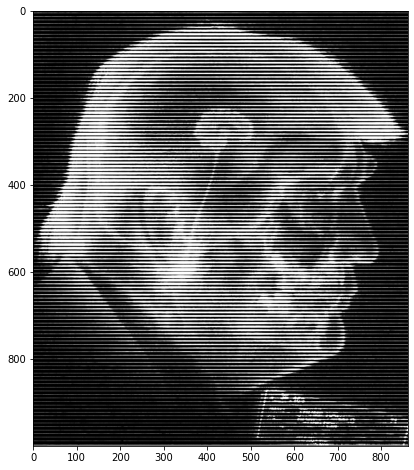

In [3]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/inputs/P2/'
xray = cv2.imread(path + 'donald_x-ray.png')
xray = cv2.cvtColor(xray, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(xray, cmap='gray')

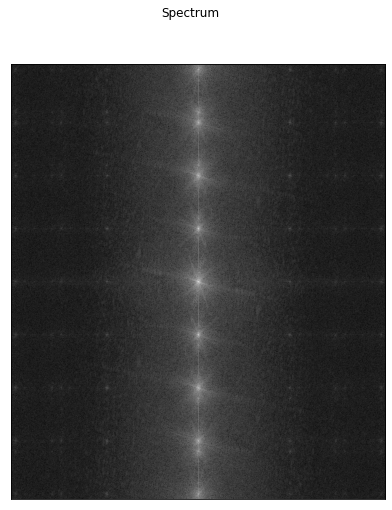

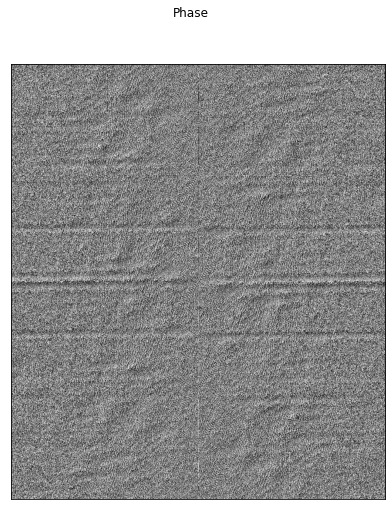

In [4]:
fft_xray, spectrum_xray, phase_xray = fftransform(xray, 'donald_xray')

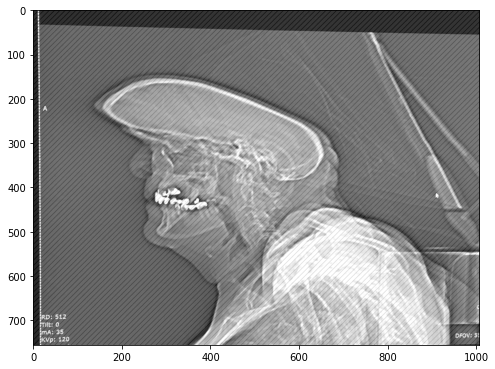

In [5]:
path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/inputs/P2/'
ctscan = cv2.imread(path + 'donald_ct_scan.png')
ctscan = cv2.cvtColor(ctscan, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(8,8))
plt.imshow(ctscan, cmap='gray')

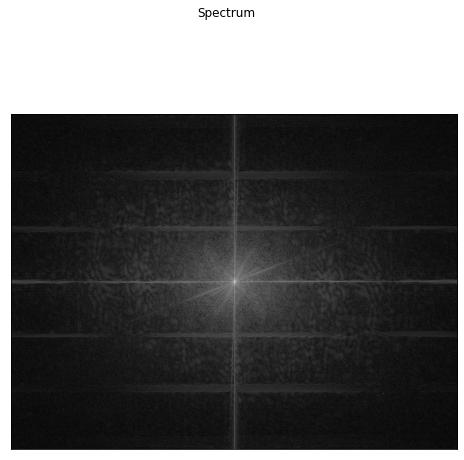

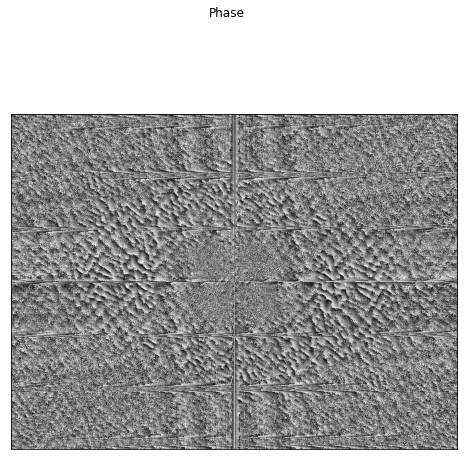

In [6]:
fft_ctscan, spectrum_ctscan, phase_ctscan = fftransform(ctscan, 'donald_ctscan')

# Part b.

In [7]:
def lowpass_filter(fft_img, xrow, yrow, xcol, ycol):
    path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P2/'
    # Creating Mask
    mask = np.zeros((fft_img.shape[0], fft_img.shape[1]))
    mask[xrow:yrow, xcol:ycol] =1
    plt.figure(figsize=(8,8))
    plt.imshow(mask, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + 'xray_mask.png')
    plt.show()
    
    fft_im = np.multiply(fft_img, mask)
    # Inverse Fourier zero shift to left top
    # and Inverse Fourier Transform
    F_img = np.fft.ifft2(np.fft.ifftshift(fft_im));
    F_img = np.abs(F_img);

    # Plot Reconstructed Image
    plt.figure(figsize=(8,8))
    plt.imshow(F_img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + 'xray_filetered.png')
    plt.show()
    
    return F_img

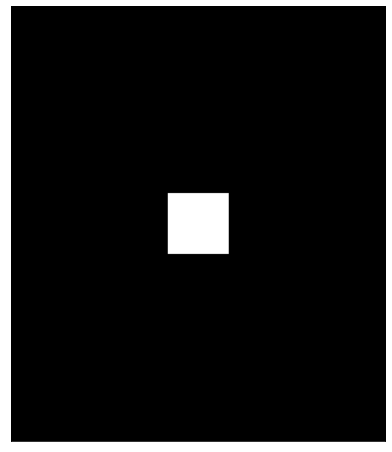

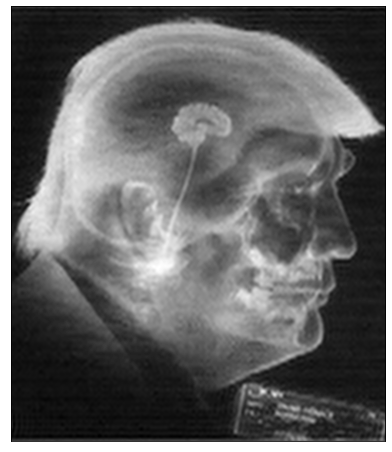

In [8]:
filtered_xray = lowpass_filter(fft_xray, 430, 570, 360, 500)

In [9]:
def notch_filter(fft_img, st):
    path = 'F://Uni/992/Digital Image Processing/Homeworks/DIP_HW3/outputs/P2/'
    # Creating Mask
    mask = np.zeros((fft_img.shape[0], fft_img.shape[1]))
    en = fft_img.shape[1]
    for i in range(mask.shape[0]):
        for j in range(st, en):
            mask[i,st:en]=1
        st-=1
        en-=1
    mask[fft_img.shape[0]//2:fft_img.shape[0],0:fft_img.shape[1]//2]=1
    mask[0:fft_img.shape[0]//2,fft_img.shape[1]//2:fft_img.shape[1]]=1
    plt.figure(figsize=(8,8))
    plt.imshow(mask, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + 'ctscan_mask.jpg')
    plt.show()
    
    fft_im = np.multiply(fft_img, mask)
    # Inverse Fourier zero shift to left top
    # and Inverse Fourier Transform
    F_img = np.fft.ifft2(np.fft.ifftshift(fft_im));
    F_img = np.abs(F_img);

    # Plot Reconstructed Image
    plt.figure(figsize=(8,8))
    plt.imshow(F_img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.savefig(path + 'ctscan_filtered.jpg')
    plt.show()
    
    return F_img

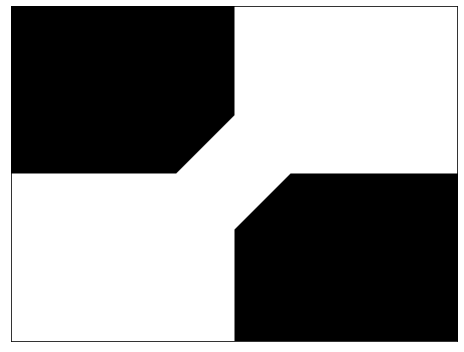

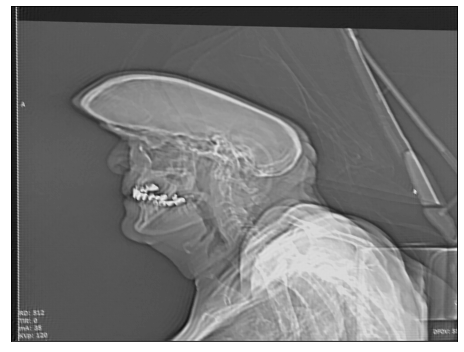

In [10]:
filtered_ctscan = notch_filter(fft_ctscan, 750)